In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
genres_ratings_df = pd.read_csv('../data/full_df.csv', index_col='Unnamed: 0')

In [5]:
genres_ratings_df.head()

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Horror,Family,Adventure,Romance,Documentary,Sci-Fi,Action,Thriller,Music,Animation
0,8.3,31,Laiye Je Yaarian,Romance,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,8.9,559,Borderless,Documentary,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,6.4,20,Just Inès,Drama,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,6.5,21,Até Onde?,"Mystery,Thriller",False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
def genre_descriptive_stats(df, key_col): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[4:] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())
    
    mean = np.round_(mean)
    median = np.round_(median)
    std = np.round_(std)
    
    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [7]:
genre_descrip_df = genre_descriptive_stats(genres_ratings_df, 'numvotes')
display(genre_descrip_df)

,mean,median,standard_deviation
Sport,2887.0,61.0,20978.0
Fantasy,12654.0,85.0,61114.0
Mystery,8374.0,112.0,46891.0
War,3188.0,81.0,19785.0
Biography,5584.0,39.0,39809.0
Drama,3936.0,70.0,29309.0
Comedy,4249.0,95.0,28139.0
History,2607.0,37.0,23051.0
Crime,8646.0,160.0,42463.0
Horror,2964.0,75.0,18195.0


In [8]:
genre_descrip_df['mean'].sort_values(ascending=False)

Adventure      22360.0
Sci-Fi         20084.0
Action         15020.0
Fantasy        12654.0
Crime           8646.0
Mystery         8374.0
Animation       8315.0
Thriller        6075.0
Biography       5584.0
Comedy          4249.0
Romance         4189.0
Drama           3936.0
War             3188.0
Horror          2964.0
Sport           2887.0
History         2607.0
Family          2435.0
Music           2264.0
Documentary      268.0
Name: mean, dtype: float64

In [9]:
genre_descrip_df.index

Index(['Sport', 'Fantasy', 'Mystery', 'War', 'Biography', 'Drama', 'Comedy',
       'History', 'Crime', 'Horror', 'Family', 'Adventure', 'Romance',
       'Documentary', 'Sci-Fi', 'Action', 'Thriller', 'Music', 'Animation'],
      dtype='object')

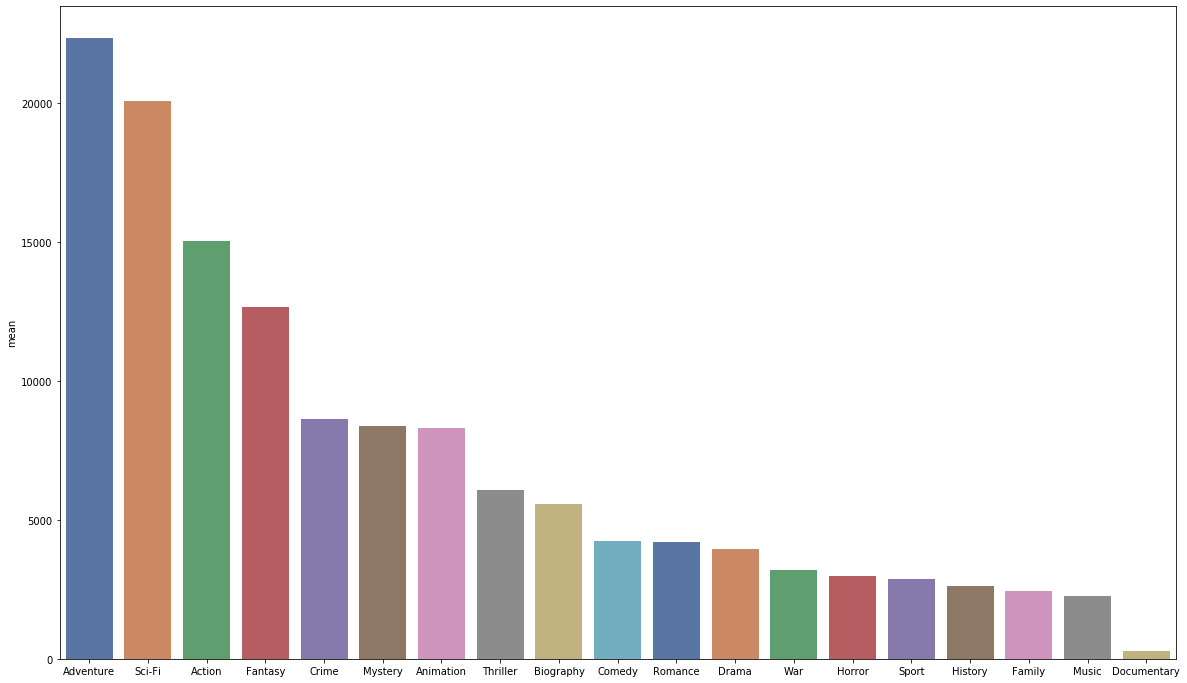

In [11]:
#plotting mean numvotes
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
mean_series_sorted = genre_descrip_df['mean'].sort_values(ascending=False)
sns.barplot(x=mean_series_sorted.index, y=mean_series_sorted, ax=ax, palette='deep')

In [ ]:
#plotting top 3 and bottom 3 numvotes
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
mean_series_top_bottom = pd.concat([mean_series_sorted.head(3), mean_series_sorted.tail(3)])
sns.barplot(x=mean_series_top_bottom.index, y=mean_series_top_bottom, ax=ax, palette=sns.color_palette("Blues_r"))

In [ ]:
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
med_series_sorted = genre_descrip_df['median'].sort_values(ascending=False)
sns.barplot(x=med_series_sorted.index, y=med_series_sorted, ax=ax)